In [3]:
import requests
year = 2022
day = 22

# url = f"https://adventofcode.com/{year}/day/{day}/input"

# with open('cookie.txt', 'r') as file:
#     session = file.read()

# headers = {'cookie': f"session={session}"}

# with open(f'inputs/day_{day}_input.txt', 'wb') as file:
#     file.write(requests.get(url, headers=headers).content)
    
import os
if os.path.exists(f"inputs/day_{day}_test.txt"):
    test = [x for x in open(f'inputs/day_{day}_test.txt', 'r')]
    for line in test[:10]:
        print(line)
print("---")
if os.path.exists(f"inputs/day_{day}_test_2.txt"):
    test_2 = [x for x in open(f'inputs/day_{day}_test_2.txt', 'r')]
    for line in test_2[:10]:
        print(line)
print("---")
lines = [x for x in open(f'inputs/day_{day}_input.txt', 'r')]
for line in lines[:10]:
    print(line)

        ...#

        .#..

        #...

        ....

...#.......#

........#...

..#....#....

..........#.

        ...#....

        .....#..

---
---
                                                  ...........#....#.........##............###.......#..............#..........#.#......#..............

                                                  .................##.....#.#.........#..........#.....#....#..........#.....#.....#............#.....

                                                  .....#.........................................###.#........##..................#...................

                                                  .#......#..............................................#.........#..#....#.#.....#........#.#......#

                                                  ..........#.....#..#..#.#.....#..........................................#.....#........#....##..#..

                                                  #..................#........#.....

In [2]:
run_test = False

if run_test:
    case = test
else:
    case = lines
    
B = []
W = []
for y, line in enumerate(case[:-2]):
    for x, c in enumerate(line):
        if c == '.':
            B.append((x,y))
        elif c == '#':
            W.append((x,y))
                

#print(B)
#print(W)
#W.remove((11,0))
# print(B)
# print(path)
instrs = []

in_number = True
running_number = ''
for p in case[-1].strip():
    if p.isdigit():
        running_number+=p
    else:
        instrs.append(int(running_number))
        in_number = True
        running_number = ''
        instrs.append(p)
#     else:
#         instrs.append(p)
if running_number != '':
    instrs.append(int(running_number))

p_history = []

p = (min(p[0] for p in B if p[1] == 0),0)
d = [(1,0),(0,1),(-1,0),(0,-1)]
d_i = 0
for instr in instrs:
#     print(instr, d[d_i])
    if instr == 'L':
        d_i = (d_i - 1)%4
    elif instr == 'R':
        d_i = (d_i + 1)%4
    else:
        for s in range(instr):
            new_p = (p[0] + d[d_i][0], p[1] + d[d_i][1])
            if new_p in W:
                #print("hit wall")
                pass
            elif new_p in B:
                p = new_p
            else:
                if d_i == 0:
                    new_p = (min(x[0] for x in B+W if x[1] == p[1]),p[1])
                elif d_i == 1:
                    new_p = (p[0],min(x[1] for x in B+W if x[0] == p[0]))
                elif d_i == 2:
                    new_p = (max(x[0] for x in B+W if x[1] == p[1]),p[1])
                elif d_i == 3:
                    new_p = (p[0],max(x[1] for x in B+W if x[0] == p[0]))
                if new_p not in W:
                    assert new_p in B
                    p = new_p
                #print(p)
            if p == new_p:
                p_history.append(p)
                #print(new_p)
    #print(p)
            
# print(p,d[d_i])
print(1000*(p[1]+1)+4*(p[0]+1)+d_i)

#print(p_history)

# 19284 wrong

58248


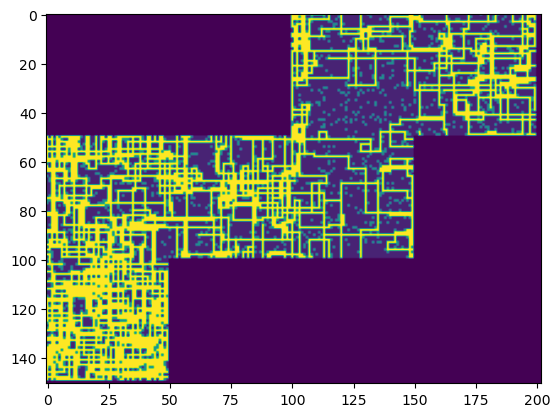

In [3]:
import numpy as np

picture = np.zeros(shape=(len(lines[0]),len(lines)))

for y in range(len(lines)):
    #out = ""
    for x in range(len(lines[0])):
        if (x,y) in p_history:
     #       out = out + '@'
            picture[x,y] = 1
        elif (x,y) in B:
      #      out = out + '.'
            picture[x,y] = 0.1
        elif (x,y) in W:
       #     out = out + '#'
            picture[x,y] = 0.5
    #print(out)
    
from matplotlib import pyplot as plt
plt.imshow(picture)
plt.show()

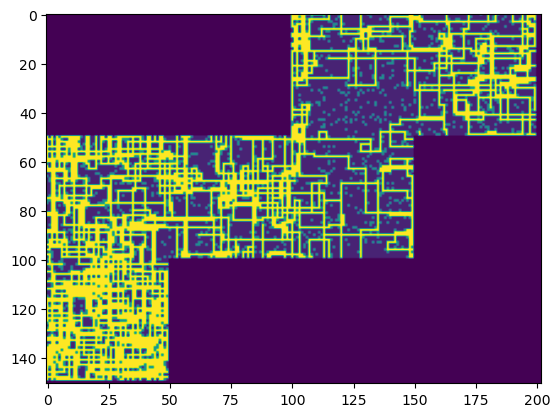

In [4]:
from matplotlib import pyplot as plt
plt.imshow(picture)
plt.show()

In [4]:
import os
day = 22
if os.path.exists(f"C:/Users/George/PycharmProjects/advent_2022/inputs/day_{day}_test.txt"):
    test = [x for x in open(f"C:/Users/George/PycharmProjects/advent_2022/inputs/day_{day}_test.txt", 'r')]
    # for line in test[:10]:
    #     print(line)

lines = [x for x in open(f"C:/Users/George/PycharmProjects/advent_2022/day_{day}_input.txt", 'r')]
# for line in lines[:10]:
#     print(line)

run_test = True

if run_test:
    case = test
else:
    case = lines

B = []
W = []
for y, line in enumerate(case[:-2]):
    for x, c in enumerate(line):
        if c == '.':
            B.append((x, y))
        elif c == '#':
            W.append((x, y))

# print(B)
# print(W)
# W.remove((11,0))
# print(B)
# print(path)
instrs = []

in_number = True
running_number = ''
for p in case[-1].strip():
    if p.isdigit():
        running_number += p
    else:
        instrs.append(int(running_number))
        in_number = True
        running_number = ''
        instrs.append(p)
#     else:
#         instrs.append(p)
if running_number != '':
    instrs.append(int(running_number))

if run_test:
    DICE_SIZE = 4
else:
    DICE_SIZE = 50


def face(p):
    x = p[0]
    y = p[1]
    if y <= DICE_SIZE and 2 * DICE_SIZE <= x < 3 * DICE_SIZE:
        return 1
    elif DICE_SIZE <= y < 2 * DICE_SIZE:
        if 0 <= x < DICE_SIZE:
            return 2
        elif DICE_SIZE <= x < 2 * DICE_SIZE:
            return 3
        elif 2 * DICE_SIZE <= x < 3 * DICE_SIZE:
            return 4
    else:
        if 2 * DICE_SIZE <= x < 3 * DICE_SIZE:
            return 5
        elif 3 * DICE_SIZE <= x < 4 * DICE_SIZE:
            return 6
    print(x, y)
    assert False
    return 0


def rotate(p):
    new_p = [xy % DICE_SIZE for xy in p]

    new_p = [DICE_SIZE - new_p[1] - 1, new_p[0]]
    return new_p


# heading right
# 1 goes to 6 and is going left
# 4 goes to 6 and is going down
# 6 goes to 1 and is going left
# heading down
# 2 goes to 5 and is going up
# 3 goes to 5 and is going right
# 5 goes to 2 and is going up
# 6 goes to 2 and is going right
# heading left
# 1 goes to 3 and is going down
# 2 goes to 6 and is going up
# 5 goes to 3 and is going up
# heading up
# 1 goes to 2 and is going down
# 2 goes to 1 and is going down
# 3 goes to 1 and is going right
# 6 goes to 4 and is heading left
# d = [(1,0),(0,1),(-1,0),(0,-1)]
RIGHT = 0
DOWN = 1
LEFT = 2
UP = 3

direction_before_change = {
    (1, 6): RIGHT,
    (4, 6): RIGHT,
    (6, 1): RIGHT,
    (2, 5): DOWN,
    (3, 5): DOWN,
    (5, 2): DOWN,
    (6, 2): DOWN,
    (1, 3): LEFT,
    (2, 6): LEFT,
    (5, 3): LEFT,
    (1, 2): UP,
    (2, 1): UP,
    (3, 1): UP,
    (6, 4): UP
}

direction_after_change = {
    (1, 6): LEFT,
    (4, 6): DOWN,
    (6, 1): LEFT,
    (2, 5): UP,
    (3, 5): RIGHT,
    (5, 2): UP,
    (6, 2): RIGHT,
    (1, 3): DOWN,
    (2, 6): UP,
    (5, 3): UP,
    (1, 2): DOWN,
    (2, 1): DOWN,
    (3, 1): RIGHT,
    (6, 4): LEFT
}

face_to_enter = {
    (RIGHT, 1): 6,
    (RIGHT, 4): 6,
    (RIGHT, 6): 1,
    (DOWN, 2): 5,
    (DOWN, 3): 5,
    (DOWN, 5): 2,
    (DOWN, 6): 2,
    (LEFT, 1): 3,
    (LEFT, 2): 6,
    (LEFT, 5): 3,
    (UP, 1): 2,
    (UP, 2): 1,
    (UP, 3): 1,
    (UP, 6): 4
}


def convert_to_face(point, new_point_face):
    point_face = face(point)

    num_rotations_from_face_to_face = {
        (1, 6): 1,
        (4, 6): 1,
        (6, 1): 2,
        (2, 5): 3,
        (3, 5): 3,
        (5, 2): 2,
        (6, 2): 1,
        (1, 3): 3,
        (2, 6): 0,
        (5, 3): 2,
        (1, 2): 2,
        (2, 1): 2,
        (3, 1): 1,
        (6, 4): 3
    }
    print(f"From face {point_face} to {new_point_face}")
    r = num_rotations_from_face_to_face[point_face, new_point_face]

    dice_face_translations = {1: (2, 0), 2: (0, 1), 3: (1, 1), 4: (2, 1), 5: (2, 2), 6: (3, 2)}

    new_p = [point[0] % DICE_SIZE, point[1] % DICE_SIZE]
    print("Point modulo before rotation", new_p)
    for _ in range(r):
        new_p = rotate(new_p)
    print("New point after rotation", new_p)

    n_d_i = direction_after_change[(point_face, new_point_face)]

    print(n_d_i)

    print(f"New Point before move: {new_p}")
    new_p = [(new_p[0] + d[n_d_i][0]) % DICE_SIZE, (new_p[1] + d[n_d_i][1]) % DICE_SIZE]
    print(f"New Point after move: {new_p}")

    new_p[0] = new_p[0] + dice_face_translations[new_point_face][0] * DICE_SIZE
    new_p[1] = new_p[1] + dice_face_translations[new_point_face][1] * DICE_SIZE
    print("New point after translation", new_p)

    #new_p = (new_p[0] + direction_after_change[(point_face, new_point_face)][0], new_p[1] + direction_after_change[(point_face, new_point_face)][1])

    return tuple(new_p)



p = (min(p[0] for p in B if p[1] == 0), 0)
d = [(1, 0), (0, 1), (-1, 0), (0, -1)]
d_i = 0
p_history = [p]
d_history = [d_i]

for instr in instrs:
    if instr == 'L':
        d_i = (d_i - 1) % 4
        d_history.append(d_i)
    elif instr == 'R':
        d_i = (d_i + 1) % 4
        d_history.append(d_i)
    else:
        for s in range(instr):
            new_p = (p[0] + d[d_i][0], p[1] + d[d_i][1])

            if new_p not in B and new_p not in W:
                print("change face")
                p_face = face(p)
                new_p_face = face_to_enter[(d_i, p_face)]
                new_new_p = convert_to_face(p, new_p_face)
                print(f"new new p {new_new_p}")

                if new_new_p in B:
                    d_i = direction_after_change[(p_face, new_p_face)]
                    p = new_new_p
                    print("changed")

                    p_history.append(p)
                    d_history.append(d_i)
            elif new_p in B:
                p = new_p
                print(p)
                p_history.append(p)

print(p, d[d_i])
print(1000 * (p[1] + 1) + 4 * (p[0] + 1) + d_history[-1])

print(p_history)
print(d_history)

# 19284 wrong

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/George/PycharmProjects/advent_2022/day_22_input.txt'

In [45]:
case = [x for x in open(f'inputs/day_{day}_input.txt', 'r')]

run_test = False

S = []
W = []
for y, line in enumerate(case[:-2]):
    for x, c in enumerate(line):
        if c == '.':
            S.append((x, y))
        elif c == '#':
            W.append((x, y))

# print(B)
# print(W)
# W.remove((11,0))
# print(B)
# print(path)
instrs = []

in_number = True
running_number = ''
for p in case[-1].strip():
    if p.isdigit():
        running_number += p
    else:
        instrs.append(int(running_number))
        in_number = True
        running_number = ''
        instrs.append(p)
#     else:
#         instrs.append(p)
if running_number != '':
    instrs.append(int(running_number))

if run_test:
    DICE_SIZE = 4
else:
    DICE_SIZE = 50

A = 'A'
B = 'B'
C = 'C'
D = 'D'
E = 'E'
F = 'F'


def face(p):
    x = p[0]
    y = p[1]
    if not run_test:
        if 0 <= y < DICE_SIZE:
            if DICE_SIZE <= x < 2 * DICE_SIZE:
                return A
            if 2 * DICE_SIZE <= x:
                return B
        if DICE_SIZE <= y < 2 * DICE_SIZE and DICE_SIZE <= x < 2 * DICE_SIZE:
            return C
        if 2 * DICE_SIZE <= y < 3 * DICE_SIZE:
            if 0 <= x < DICE_SIZE:
                return E
            if DICE_SIZE <= x < 2 * DICE_SIZE:
                return D
        if 3 * DICE_SIZE <= y < 4 * DICE_SIZE and 0 <= x < DICE_SIZE:
            return F
        assert False


def rotate(p):
    new_p = [xy % DICE_SIZE for xy in p]

    new_p = [DICE_SIZE - new_p[1] - 1, new_p[0]]
    return new_p


# heading right
# 1 goes to 6 and is going left
# 4 goes to 6 and is going down
# 6 goes to 1 and is going left
# heading down
# 2 goes to 5 and is going up
# 3 goes to 5 and is going right
# 5 goes to 2 and is going up
# 6 goes to 2 and is going right
# heading left
# 1 goes to 3 and is going down
# 2 goes to 6 and is going up
# 5 goes to 3 and is going up
# heading up
# 1 goes to 2 and is going down
# 2 goes to 1 and is going down
# 3 goes to 1 and is going right
# 6 goes to 4 and is heading left
# d = [(1,0),(0,1),(-1,0),(0,-1)]
RIGHT = 0
DOWN = 1
LEFT = 2
UP = 3

direction_after_change = {
    (E,C):RIGHT,
    (A,F):RIGHT,
    (B,F):UP,
    (B,D):LEFT,
    (C,B):UP,
    (D,B):LEFT,
    (F,D):UP,
    (B,C):LEFT,
    (D,F):LEFT,
    (F,B):DOWN,
    (F,A):DOWN,
    (E,A):RIGHT,
    (C,E):DOWN,
    (A,E):RIGHT
}


face_to_enter = {
    (RIGHT, B): D,
    (RIGHT, C): B,
    (RIGHT, D): B,
    (RIGHT, F): D,
    (DOWN, F): B,
    (DOWN, D): F,
    (DOWN, B): C,
    (LEFT, F): A,
    (LEFT, E): A,
    (LEFT, C): E,
    (LEFT, A): E,
    (UP, E): C,
    (UP, A): F,
    (UP, B): F
}

num_rotations_from_face_to_face = {
    (E, C): 1,
    (A, F): 1,
    (B, F): 0,
    (B, D): 2,
    (C, B): 3,
    (D, B): 2,
    (F, D): 3,
    (B, C): 1,
    (D, F): 1,
    (F, B): 0,
    (F, A): 3,
    (E, A): 2,
    (C, E): 3,
    (A, E): 2
}


def convert_to_face(point, new_point_face):
    point_face = face(point)


#     print(f"From face {point_face} to {new_point_face}")
    r = num_rotations_from_face_to_face[point_face, new_point_face]

    dice_face_translations = {A: (1, 0), B: (2, 0), C: (1, 1), D: (1, 2), E: (0, 2), F: (0, 3)}

    new_p = [point[0] % DICE_SIZE, point[1] % DICE_SIZE]
#     print("Point modulo before rotation", new_p)
    for _ in range(r):
        new_p = rotate(new_p)
#     print("New point after rotation", new_p)

    n_d_i = direction_after_change[(point_face, new_point_face)]

#     print(n_d_i)

#     print(f"New Point before move: {new_p}")
    new_p = [(new_p[0] + d[n_d_i][0]) % DICE_SIZE, (new_p[1] + d[n_d_i][1]) % DICE_SIZE]
#     print(f"New Point after move: {new_p}")

    new_p[0] = new_p[0] + dice_face_translations[new_point_face][0] * DICE_SIZE
    new_p[1] = new_p[1] + dice_face_translations[new_point_face][1] * DICE_SIZE

    # new_p = (new_p[0] + direction_after_change[(point_face, new_point_face)][0], new_p[1] + direction_after_change[(point_face, new_point_face)][1])

    return tuple(new_p)


%matplotlib inline
def draw(p_history):
    picture = np.zeros(shape=(len(lines),len(lines[0])))

    for y in range(len(lines)):
        #out = ""
        for x in range(len(lines[0])):
            if (x,y) in S:
          #      out = out + '.'
                picture[y,x] = 0.1
            elif (x,y) in W:
           #     out = out + '#'
                picture[y,x] = 0.2
        #print(out)
        
        for i, (x,y) in enumerate(p_history):
 #       out = out + '@'
            picture[y,x] = 0.5 + i/len(p_history) * 0.5
    

    
    plt.figure(figsize=(6,10))    
    plt.imshow(picture)
    plt.show()    



p = (min(p[0] for p in S if p[1] == 0), 0)
d = [(1, 0), (0, 1), (-1, 0), (0, -1)]
d_i = 0
#p_history = [(p[0],p[1],d_i)]
p_history = []
for instr in instrs:
    if instr == 'L':
        d_i = (d_i - 1) % 4
        p_history.append((p[1],p[0],d_i))
    elif instr == 'R':
        d_i = (d_i + 1) % 4
        p_history.append((p[1],p[0],d_i))
    else:
        for s in range(instr):
            new_p = (p[0] + d[d_i][0], p[1] + d[d_i][1])

            if new_p not in S and new_p not in W:
#                 print("change face")
                p_face = face(p)
                new_p_face = face_to_enter[(d_i, p_face)]
                new_new_p = convert_to_face(p, new_p_face)
#                 print(f"new new p {new_new_p}")

                if new_new_p in S:
                    d_i = direction_after_change[(p_face, new_p_face)]
                    #print(f"FROM: {p_face} TO: {new_p_face}")
                    p = new_new_p
#                     print("changed")

                    p_history.append((p[1],p[0],d_i))
                    
            elif new_p in S:
                p = new_p
#                 print(p)
                p_history.append((p[1],p[0],d_i))

print(p_history[-1])
print(1000 * (p_history[-1][0] + 1) + 4 * (p_history[-1][1] + 1) + p_history[-1][2])

#print(p_history)
#print(d_history)

# 19284 wrong
# 182043 too high
# 10731 too low

# 179091 ??

(178, 21, 3)
179091


In [46]:
print(i)

11175


In [47]:
my_d = [(1, 0), (0, 1), (-1, 0), (0, -1)]

john_D = [(-1,0),(0,1),(1,0),(0,-1)]

for i in range(len(C_p_history)):
    me = (p_history[i][0],p_history[i][1],john_D.index(tuple(reversed(my_d[p_history[i][2]]))))
    john = C_p_history[i]
    if me != john:
        for j in range(i-1,i+2):
            print(i, (p_history[j][0],p_history[j][1],john_D.index(tuple(reversed(my_d[p_history[j][2]])))),C_p_history[j])
            last_good = i
    #        print(i,me,john)
        break

Me


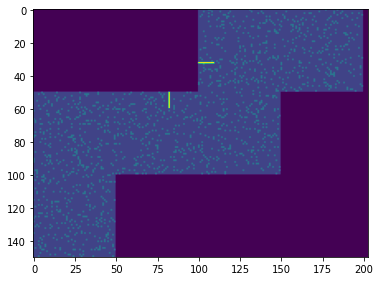

John


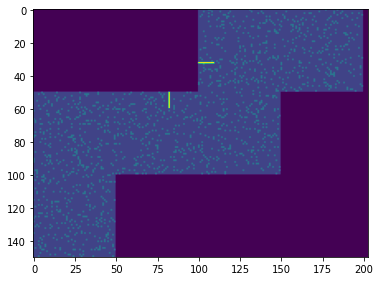

In [48]:
import numpy as np

from matplotlib import pyplot as plt

def draw(p_history, n=None, r0=None, r1=None, c0 = None,c1 = None):
    picture = np.zeros(shape=(len(lines[0]),len(lines)))
    j_picture = np.zeros(shape=(len(lines[0]),len(lines)))

    for x in range(len(lines[0])):
        for y in range(len(lines)):
            if (x,y) in S:
                picture[x,y] = 0.1
                j_picture[x,y] = 0.1
            elif (x,y) in W:
                picture[x,y] = 0.2
                j_picture[x,y] = 0.2

    if not n:
        n = len(p_history)
    
    for i, (r,c, d) in enumerate(p_history[n-10:n+10]):
        picture[c,r] = 0.5 + i/n * 0.5

    
    print("Me")
    plt.figure(figsize=(6,10))    
    if r0 and r1 and c0 and c1:
        plt.imshow(picture[c0:c1, r0:r1])
    else:
        plt.imshow(picture)
    plt.show()    

    
    for i, (r,c, d) in enumerate(C_p_history[n-10:n+10]):
        j_picture[c,r] = 0.5 + i/n * 0.5

    print("John")    
    plt.figure(figsize=(6,10))    
    if r0 and r1 and c0 and c1:
        plt.imshow(j_picture[c0:c1, r0:r1])
    else:
        plt.imshow(j_picture)
    plt.show()
    
draw(p_history, last_good, 0)#,50,50,100)

In [9]:
#!/usr/bin/python3
import sys
from decimal import Decimal
import math
from copy import deepcopy
from collections import defaultdict, deque
infile = 'inputs/day_22_input.txt'
data = open(infile).read()
lines = [x for x in data.split('\n')]

G, instr = data.split('\n\n')
G = G.split('\n')
instr = instr.strip()

D = [(-1,0),(0,1),(1,0),(0,-1)]

R = len(G)
C = len(G[0])
for r in range(R):
    while len(G[r]) < C:
        G[r] += ' '
    assert len(G[r])==C

CUBE = C//3
assert CUBE == R//4
#print(CUBE)

# .12
# .3.
# 54.
# 6..
REGION = [(0,1),(0,2),(1,1),(2,1),(2,0),(3,0)]

def regionToGlobal(r,c,region):
    rr,cc = REGION[region-1]
    return (rr*CUBE+r,cc*CUBE+c)

def getRegion(r,c):
    for i,(rr,cc) in enumerate(REGION):
        if rr*CUBE<=r<(rr+1)*CUBE and cc*CUBE<=c<(cc+1)*CUBE:
            return (i+1, r-rr*CUBE, c-cc*CUBE)
    assert False, (r,c)

def newCoords(r,c,d,nd):
    if d==0:
        assert r==0
        x = c
    if d==1:
        assert c==CUBE-1
        x = r
    if d==2:
        assert r==CUBE-1
        x = CUBE-1-c
    if d==3:
        assert c==0
        x = CUBE-1-r

    if nd==0:
        return (CUBE-1,x)
    if nd==1:
        return (x,0)
    if nd==2:
        return (0,CUBE-1-x)
    if nd==3:
        return (CUBE-1-x,CUBE-1)

#  3   6
# 542 512
#  6   3

#  1   5
# 532 164
#  4   2

#  3   3
# 124 154
#  6   6

def getDest(r,c,d,part):
    if part == 1:
        r = (r+D[d][0])%R
        c = (c+D[d][1])%C
        while G[r][c]==' ':
            r = (r+D[d][0])%R
            c =(c+D[d][1])%C
        return (r,c,d)

    region,rr,rc = getRegion(r,c)
    # 0=up, 1=right,2=down,3=left
    # If I am leaving region R in direction D, I enter region NR in direction ND
    newRegion,nd = {
        (4,0):(3,0), (4,1):(2,3), (4,2):(6,3), (4,3):(5,3),
        (1,0):(6,1), (1,1):(2,1), (1,2):(3,2), (1,3):(5,1),
        (3,0):(1,0), (3,1):(2,0), (3,2):(4,2), (3,3):(5,2),
        (6,0):(5,0), (6,1):(4,0), (6,2):(2,2), (6,3):(1,2),
        (2,0):(6,0), (2,1):(4,3), (2,2):(3,3), (2,3):(1,3),
        (5,0):(3,1), (5,1):(4,1), (5,2):(6,2), (5,3):(1,1)}[(region,d)]

    nr,nc = newCoords(rr,rc,d,nd)
    assert 0<=nr<CUBE and 0<=nc<CUBE
    nr,nc = regionToGlobal(nr,nc,newRegion)
    assert G[nr][nc] in ['.','#'], f'{G[nr][nc]}'
    return (nr,nc,nd)


C_p_history = []

def solve(part):
    # compute starting location
    r = 0
    c = 0
    d = 1
    while G[r][c] != '.':
        c += 1

    i = 0
    while i < len(instr):
        n = 0
        while i<len(instr) and instr[i].isdigit():
            n = n*10 + int(instr[i])
            i += 1
        for _ in range(n):
            #print(r,c,d)
            assert G[r][c]=='.',(r,c)
            rr = (r+D[d][0])%R
            cc = (c+D[d][1])%C
            if G[rr][cc]==' ':
                (nr,nc,nd) = getDest(r,c,d,part)
                #print(f'r={r} c={c} rr={rr} cc={cc} nr={nr} nc={nc} region={getRegion(r,c)} d={d} newRegion={getRegion(nr,nc)} nd={nd}')
                if G[nr][nc]=='#':
                    break
                (r,c,d) = (nr,nc,nd)
                C_p_history.append((r,c,d))
                continue
            elif G[rr][cc]=='#':
                break
            else:
                r = rr
                c = cc
            C_p_history.append((r,c,d))
        if i==len(instr):
            break
        turn = instr[i]
        if turn == 'L':
            d = (d+3)%4
        elif turn == 'R':
            d = (d+1)%4
        else:
            assert False, (i,instr[i:],instr[i])
        i += 1
        #print('TURN', d)
        C_p_history.append((r,c,d))
    DV = {0:3,1:0,2:1,3:2}
    return ((r+1)*1000 + (c+1)*4 + DV[d])
#print(solve(1))
print(solve(2))

179091
